In [74]:

import warnings
import sys
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import sys
%run Securities.py

In [75]:
tech_tickers = ["TSLA", "AMZN", "AAPL", "GOOG", "MSFT"]

In [76]:
securities = Stock_returns_analysis(tech_tickers, start_date = "2021-1-1", end_date = "2022-1-1")

In [77]:
securities.download_stocks_closing(column_name = "Adj Close")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,AMZN,AAPL,GOOG,MSFT
Date,,,,,
2021-01-04,243.256668,159.331497,127.679985,86.412003,213.341995
2021-01-05,245.036667,160.925507,129.258606,87.045998,213.547806
2021-01-06,251.993332,156.919006,124.907562,86.764503,208.010651
2021-01-07,272.013336,158.108002,129.169815,89.362503,213.930038
2021-01-08,293.339996,159.134995,130.284698,90.360497,215.233429
...,...,...,...,...,...
2021-12-27,364.646667,169.669495,179.016129,148.063995,338.423340
2021-12-28,362.823334,170.660995,177.983688,146.447998,337.237396
2021-12-29,362.063324,169.201004,178.073029,146.504501,337.929230


In [78]:
securities.stock_stats()

,TSLA,AMZN,AAPL,GOOG,MSFT
max,409.970001,186.570496,179.016129,150.709000,339.075562
min,187.666672,147.597504,114.976006,86.412003,208.010651
mean,259.998162,167.193349,139.587720,125.530687,271.712491


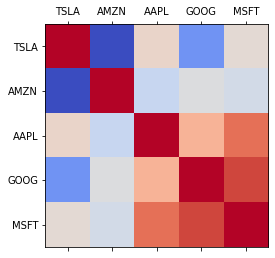

In [79]:
securities.stock_relationship()

In [80]:
securities.stock_stats()

,TSLA,AMZN,AAPL,GOOG,MSFT
max,409.970001,186.570496,179.016129,150.709000,339.075562
min,187.666672,147.597504,114.976006,86.412003,208.010651
mean,259.998162,167.193349,139.587720,125.530687,271.712491


In [81]:
securities.fill_values("backward")

,TSLA,AMZN,AAPL,GOOG,MSFT
Date,,,,,
2021-01-04,243.256668,159.331497,127.679985,86.412003,213.341995
2021-01-05,245.036667,160.925507,129.258606,87.045998,213.547806
2021-01-06,251.993332,156.919006,124.907562,86.764503,208.010651
2021-01-07,272.013336,158.108002,129.169815,89.362503,213.930038
2021-01-08,293.339996,159.134995,130.284698,90.360497,215.233429
...,...,...,...,...,...
2021-12-27,364.646667,169.669495,179.016129,148.063995,338.423340
2021-12-28,362.823334,170.660995,177.983688,146.447998,337.237396
2021-12-29,362.063324,169.201004,178.073029,146.504501,337.929230


array([<AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>], dtype=object)

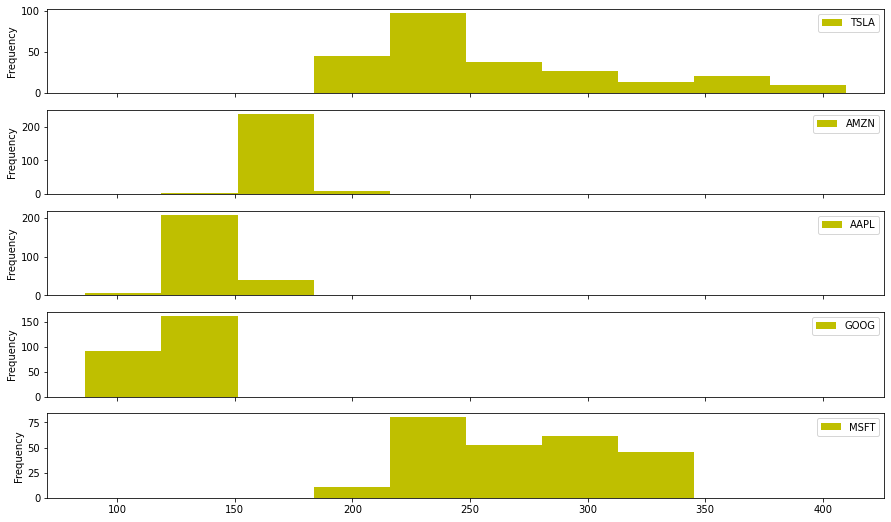

In [82]:
securities.data_distribution()

<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

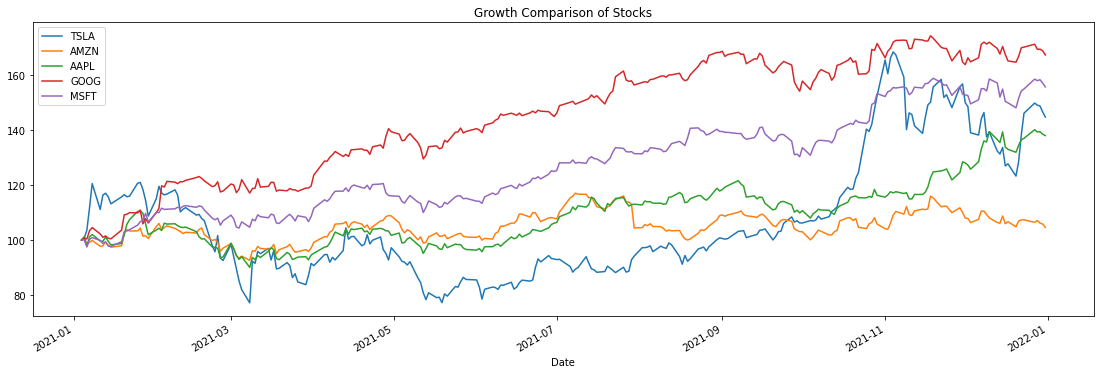

In [83]:
securities.normalization()

In [84]:
securities.get_returns("Simple")

,TSLA,AMZN,AAPL,GOOG,MSFT
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.007317,0.010004,0.012364,0.007337,0.000965
2021-01-06,0.028390,-0.024897,-0.033662,-0.003234,-0.025929
2021-01-07,0.079447,0.007577,0.034123,0.029943,0.028457
2021-01-08,0.078403,0.006496,0.008631,0.011168,0.006093
...,...,...,...,...,...
2021-12-27,0.025248,-0.008178,0.022975,0.006263,0.023186
2021-12-28,-0.005000,0.005844,-0.005767,-0.010914,-0.003504
2021-12-29,-0.002095,-0.008555,0.000502,0.000386,0.002051


In [85]:
securities.individual_return()

The Simple return of the stocks are 
TSLA    51.53
AMZN     7.38
AAPL    35.24
GOOG    54.15
MSFT    46.36
dtype: float64


In [86]:
securities.individual_risk_factor()

TSLA    0.545551
AMZN    0.239457
AAPL    0.249160
GOOG    0.236126
MSFT    0.208798
dtype: float64
The lowest risk factor is 0.20879804585859432
